## Carregando e visualizando dados
Vamos carregar o arquivo de dados para este exemplo e verificar estatísticas e colunas resumidas para esse arquivo.

In [ ]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics

prospect_data = pd.read_csv("02_05_browsing.csv")

prospect_data.dtypes

ID_SESSAO             int64
IMAGENS               int64
AVALIACOES            int64
FAQ                   int64
ESPECS                int64
ENVIO                 int64
COMPRADO_JUNTO        int64
COMPARAR_SIMILARES    int64
VER_SIMILARES         int64
GARANTIA              int64
LINKS_PATROCINADOS    int64
COMPRA                int64
dtype: object

In [ ]:
# Observando os principais registros para entender como os dados se parecem.
prospect_data.head()

,ID_SESSAO,IMAGENS,AVALIACOES,FAQ,ESPECS,ENVIO,COMPRADO_JUNTO,COMPARAR_SIMILARES,VER_SIMILARES,GARANTIA,LINKS_PATROCINADOS,COMPRA
0,1001,0,0,1,0,1,0,0,0,1,0,0
1,1002,0,1,1,0,0,0,0,0,0,1,0
2,1003,1,0,1,1,1,0,0,0,1,0,0
3,1004,1,0,0,0,1,1,1,0,0,0,0
4,1005,1,1,1,0,1,0,1,0,0,0,0


In [ ]:
#Fazendo uma análise estatística resumida dos dados
prospect_data.describe()

,ID_SESSAO,IMAGENS,AVALIACOES,FAQ,ESPECS,ENVIO,COMPRADO_JUNTO,COMPARAR_SIMILARES,VER_SIMILARES,GARANTIA,LINKS_PATROCINADOS,COMPRA
count,500.000000,500.000000,500.0000,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1250.500000,0.510000,0.5200,0.440000,0.4800,0.528000,0.500000,0.580000,0.468000,0.532000,0.550000,0.370000
std,144.481833,0.500401,0.5001,0.496884,0.5001,0.499715,0.500501,0.494053,0.499475,0.499475,0.497992,0.483288
min,1001.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1125.750000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1250.500000,1.000000,1.0000,0.000000,0.0000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,1375.250000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1500.000000,1.000000,1.0000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Análise de correlação

In [ ]:
prospect_data.corr()['COMPRA']

ID_SESSAO             0.026677
IMAGENS               0.046819
AVALIACOES            0.404628
FAQ                  -0.095136
ESPECS                0.009950
ENVIO                -0.022239
COMPRADO_JUNTO       -0.103562
COMPARAR_SIMILARES    0.190522
VER_SIMILARES        -0.096137
GARANTIA              0.179156
LINKS_PATROCINADOS    0.110328
COMPRA                1.000000
Name: COMPRA, dtype: float64

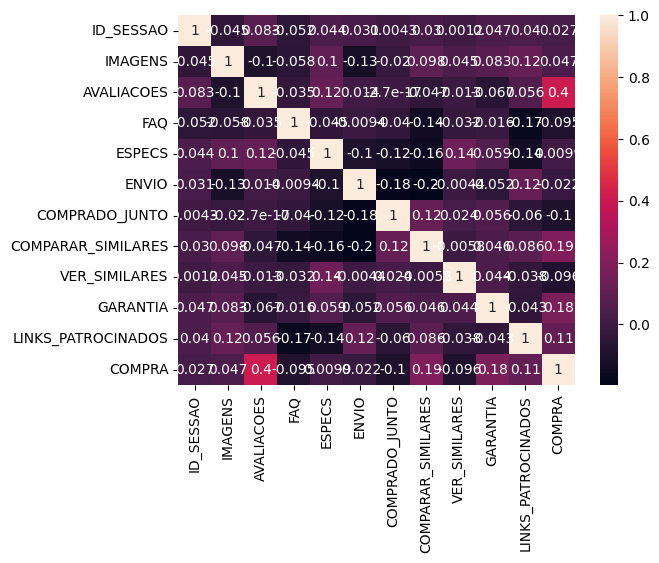

In [ ]:
#correlação entre indicadores
import seaborn as sns
cor = prospect_data.corr()

#matriz de correlação
ax = sns.heatmap(cor, annot=True)

In [ ]:
#Colunas com baixa correlação
predictors = prospect_data[['AVALIACOES','COMPRADO_JUNTO','COMPARAR_SIMILARES','GARANTIA','LINKS_PATROCINADOS']]
targets = prospect_data.COMPRA

##  Divisão de treinamento e testes

Agora dividimos o modelo em dados de treinamento e testes na proporção de 70:30

In [ ]:
pred_train, pred_test, tar_train, tar_test  =   train_test_split(predictors, targets, test_size=.3)

print( "Preditor - Treinamento : ", pred_train.shape, "Preditor - Teste : ", pred_test.shape )

Preditor - Treinamento :  (350, 5) Preditor - Teste :  (150, 5)


## Construindo o modelo e verificar a precisão

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier=GaussianNB()
classifier=classifier.fit(pred_train,tar_train)

predictions=classifier.predict(pred_test)

#Analisar a precisão das previsões
sklearn.metrics.confusion_matrix(tar_test,predictions)


array([[67, 17],
       [19, 47]])

In [ ]:
sklearn.metrics.accuracy_score(tar_test, predictions)

0.76

Em vez de fazer uma previsão Sim/Não, podemos fazer um cálculo de probabilidade para mostrar a probabilidade de o cliente em potencial comprar o produto

In [ ]:
pred_prob=classifier.predict_proba(pred_test)
pred_prob[0,1]

0.3933999128945201

A probabilidade acima pode ser lida como 35% de chance de que o cliente em potencial compre o produto.

## Previsões em tempo real

Usando o modelo para previsões em tempo real. Assim, quando o cliente começa a visitar as páginas uma a uma, coletamos essa lista e a usamos para computar a probabilidade. Fazemos isso para cada novo clique que chega.

Então, o cliente em potencial acabou de chegar ao site. Não há cliques significativos. Vamos computar a probabilidade. A matriz de valores passados tem os valores para AVALIACOES, COMPRADO_JUNTO, COMPARAR_SIMILARES, GARANTIA e LINKS_PATROCINADOS. Então no começo a matriz só tem zeros


In [ ]:
browsing_data = np.array([0,0,0,0,0]).reshape(1, -1)
print("Novo visitante: propensão :",classifier.predict_proba(browsing_data)[:,1] )


Novo visitante: propensão : [0.05900309]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Portanto, a probabilidade inicial é 6%. Agora supondo que o cliente faça uma comparação de produtos similares. A matriz muda para incluir um 1 para essa função. A nova probabilidade será

In [ ]:
browsing_data = np.array([0,0,1,0,0]).reshape(1, -1)
print("Após verificar produtos similares: propensão :",classifier.predict_proba(browsing_data)[:,1] )


Após verificar produtos similares: propensão : [0.11469328]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Ela aumenta. A seguir, verifica avaliações.

In [ ]:
browsing_data = np.array([1,0,1,0,0]).reshape(1, -1)
print("Após verificar avaliações: propensão :",classifier.predict_proba(browsing_data)[:,1] )


Após verificar avaliações: propensão : [0.57264091]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Ele dispara e passa de 50%. Pode haver um limiar para quando desejarmos oferecer bate-papo. Podemos continuar verificando essa probabilidade em relação a esse limiar para ver se desejam exibir uma janela de bate-papo.

Este exemplo mostra como podemos usar a análise preditiva em tempo real para decidir se um cliente em potencial tem alta propensão a conversão e oferecer a ele um bate-papo com um representante/agente de vendas.
